In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# matplotlib 한글 폰트 오류 문제 해결 

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

#폰트파일위치 지정해서 설정
font_path = './data./NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()

#폰트 설정
plt.rc('font', family=font_name)

# 마이너스 깨짐 현상 해결
plt.rcParams['axes.unicode_minus'] = False

# matplotlib 폰트 패밀리 출력
plt.rcParams['font.family']

['NanumGothic']

In [3]:
df = pd.read_csv('./data./train.csv')
trad_df = pd.read_csv('./data./international_trade.csv')
test_df = pd.read_csv('./data./test.csv')

In [4]:
df.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


In [5]:
trad_df.head()

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38


In [6]:
test_df.head()

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J


In [7]:
trad_df

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
...,...,...,...,...,...,...,...
1269,2023-02,포포(papaw)[파파야(papaya)],0,0,23830,71,-71
1270,2023-02,사과,135165,351,0,0,351
1271,2023-02,배,2206012,5411,1,0,5411
1272,2023-02,신 체리[프루너스 체라서스(Prunus cerasus)],5,0,0,0,0


In [8]:
df.describe()

,supply(kg),price(원/kg)
count,5.939700e+04,59397.000000
mean,1.189453e+04,1131.680674
std,5.226400e+04,2029.941445
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,0.000000e+00,0.000000
75%,3.800000e+03,1519.000000
max,1.222800e+06,20909.000000


In [9]:
df.index

RangeIndex(start=0, stop=59397, step=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


In [11]:
trad_df.index

RangeIndex(start=0, stop=1274, step=1)

In [12]:
trad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      1274 non-null   object
 1   품목명     1274 non-null   object
 2   수출 중량   1274 non-null   int64 
 3   수출 금액   1274 non-null   int64 
 4   수입 중량   1274 non-null   int64 
 5   수입 금액   1274 non-null   int64 
 6   무역수지    1274 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 69.8+ KB


In [13]:
trad_df['품목명'] = trad_df['품목명'].str.replace(r'.*감귤.*', 'TG', regex=True)
trad_df['품목명'] = trad_df['품목명'].str.replace(r'.*브로콜리.*', 'BC', regex=True)
trad_df['품목명'] = trad_df['품목명'].str.replace(r'.*무.*', 'RD', regex=True)
trad_df['품목명'] = trad_df['품목명'].str.replace(r'.*당근.*', 'CR', regex=True)
trad_df['품목명'] = trad_df['품목명'].str.replace(r'.*양배추.*', 'CB', regex=True)

trad_df = trad_df[trad_df['품목명'].isin(['TG', 'BC', 'RD', 'CR', 'CB'])]
trad_df

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
3,2019-01,BC,160,1,638913,563,-562
4,2019-01,CB,0,0,7580,38,-38
5,2019-01,CB,184650,94,395802,90,4
8,2019-01,CR,23150,22,7466150,2955,-2934
12,2019-01,RD,2627,23,94529,464,-441
...,...,...,...,...,...,...,...
1250,2023-02,CB,13188,13,377456,104,-91
1253,2023-02,CR,22510,20,9260020,3758,-3737
1254,2023-02,RD,4000,4,2,0,4
1258,2023-02,RD,1319,14,104566,454,-440


In [14]:
type(df.loc[0, 'timestamp'])

str

In [15]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [16]:
type(df.loc[0, 'timestamp'])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
trad_df['기간'] = pd.to_datetime(trad_df['기간'], format='%Y-%m')
trad_df

C:\Users\navyb\AppData\Local\Temp\ipykernel_16976\167374369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trad_df['기간'] = pd.to_datetime(trad_df['기간'], format='%Y-%m')


,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
3,2019-01-01,BC,160,1,638913,563,-562
4,2019-01-01,CB,0,0,7580,38,-38
5,2019-01-01,CB,184650,94,395802,90,4
8,2019-01-01,CR,23150,22,7466150,2955,-2934
12,2019-01-01,RD,2627,23,94529,464,-441
...,...,...,...,...,...,...,...
1250,2023-02-01,CB,13188,13,377456,104,-91
1253,2023-02-01,CR,22510,20,9260020,3758,-3737
1254,2023-02-01,RD,4000,4,2,0,4
1258,2023-02-01,RD,1319,14,104566,454,-440


In [18]:
type(trad_df.loc[3, '기간'])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
trad_df

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
3,2019-01-01,BC,160,1,638913,563,-562
4,2019-01-01,CB,0,0,7580,38,-38
5,2019-01-01,CB,184650,94,395802,90,4
8,2019-01-01,CR,23150,22,7466150,2955,-2934
12,2019-01-01,RD,2627,23,94529,464,-441
...,...,...,...,...,...,...,...
1250,2023-02-01,CB,13188,13,377456,104,-91
1253,2023-02-01,CR,22510,20,9260020,3758,-3737
1254,2023-02-01,RD,4000,4,2,0,4
1258,2023-02-01,RD,1319,14,104566,454,-440


In [20]:
trad_df.reset_index(drop=True)

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01-01,BC,160,1,638913,563,-562
1,2019-01-01,CB,0,0,7580,38,-38
2,2019-01-01,CB,184650,94,395802,90,4
3,2019-01-01,CR,23150,22,7466150,2955,-2934
4,2019-01-01,RD,2627,23,94529,464,-441
...,...,...,...,...,...,...,...
301,2023-02-01,CB,13188,13,377456,104,-91
302,2023-02-01,CR,22510,20,9260020,3758,-3737
303,2023-02-01,RD,4000,4,2,0,4
304,2023-02-01,RD,1319,14,104566,454,-440


In [21]:
df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [22]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1
...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3


In [23]:
trad_df['year'] = pd.to_datetime(trad_df['기간'], format='%Y-%m').dt.year
trad_df['month'] = pd.to_datetime(trad_df['기간'], format='%Y-%m').dt.month

C:\Users\navyb\AppData\Local\Temp\ipykernel_16976\667507739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trad_df['year'] = pd.to_datetime(trad_df['기간'], format='%Y-%m').dt.year
C:\Users\navyb\AppData\Local\Temp\ipykernel_16976\667507739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trad_df['month'] = pd.to_datetime(trad_df['기간'], format='%Y-%m').dt.month


In [24]:
trad_df

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지,year,month
3,2019-01-01,BC,160,1,638913,563,-562,2019,1
4,2019-01-01,CB,0,0,7580,38,-38,2019,1
5,2019-01-01,CB,184650,94,395802,90,4,2019,1
8,2019-01-01,CR,23150,22,7466150,2955,-2934,2019,1
12,2019-01-01,RD,2627,23,94529,464,-441,2019,1
...,...,...,...,...,...,...,...,...,...
1250,2023-02-01,CB,13188,13,377456,104,-91,2023,2
1253,2023-02-01,CR,22510,20,9260020,3758,-3737,2023,2
1254,2023-02-01,RD,4000,4,2,0,4,2023,2
1258,2023-02-01,RD,1319,14,104566,454,-440,2023,2


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
trad_df.reset_index(drop=True)

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지,year,month
0,2019-01-01,BC,160,1,638913,563,-562,2019,1
1,2019-01-01,CB,0,0,7580,38,-38,2019,1
2,2019-01-01,CB,184650,94,395802,90,4,2019,1
3,2019-01-01,CR,23150,22,7466150,2955,-2934,2019,1
4,2019-01-01,RD,2627,23,94529,464,-441,2019,1
...,...,...,...,...,...,...,...,...,...
301,2023-02-01,CB,13188,13,377456,104,-91,2023,2
302,2023-02-01,CR,22510,20,9260020,3758,-3737,2023,2
303,2023-02-01,RD,4000,4,2,0,4,2023,2
304,2023-02-01,RD,1319,14,104566,454,-440,2023,2


In [27]:
trad_df = trad_df.drop(columns=['기간'])
trad_df

,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지,year,month
3,BC,160,1,638913,563,-562,2019,1
4,CB,0,0,7580,38,-38,2019,1
5,CB,184650,94,395802,90,4,2019,1
8,CR,23150,22,7466150,2955,-2934,2019,1
12,RD,2627,23,94529,464,-441,2019,1
...,...,...,...,...,...,...,...,...
1250,CB,13188,13,377456,104,-91,2023,2
1253,CR,22510,20,9260020,3758,-3737,2023,2
1254,RD,4000,4,2,0,4,2023,2
1258,RD,1319,14,104566,454,-440,2023,2


In [28]:
df = df.drop(columns=['timestamp'])
df

,ID,item,corporation,location,supply(kg),price(원/kg),year,month
0,TG_A_J_20190101,TG,A,J,0.0,0.0,2019,1
1,TG_A_J_20190102,TG,A,J,0.0,0.0,2019,1
2,TG_A_J_20190103,TG,A,J,60601.0,1728.0,2019,1
3,TG_A_J_20190104,TG,A,J,25000.0,1408.0,2019,1
4,TG_A_J_20190105,TG,A,J,32352.0,1250.0,2019,1
...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,RD,F,J,452440.0,468.0,2023,2
59393,RD_F_J_20230228,RD,F,J,421980.0,531.0,2023,2
59394,RD_F_J_20230301,RD,F,J,382980.0,574.0,2023,3
59395,RD_F_J_20230302,RD,F,J,477220.0,523.0,2023,3


In [29]:
test_df

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J
...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J
1088,RD_F_J_20230328,2023-03-28,RD,F,J
1089,RD_F_J_20230329,2023-03-29,RD,F,J
1090,RD_F_J_20230330,2023-03-30,RD,F,J


In [30]:
print(df['item'].unique())

['TG' 'CR' 'CB' 'RD' 'BC']


In [31]:
df['item'].value_counts()

item
TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: count, dtype: int64

In [34]:
trad_df['품목명'].value_counts()

품목명
CB    100
RD     56
BC     50
CR     50
TG     50
Name: count, dtype: int64

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont

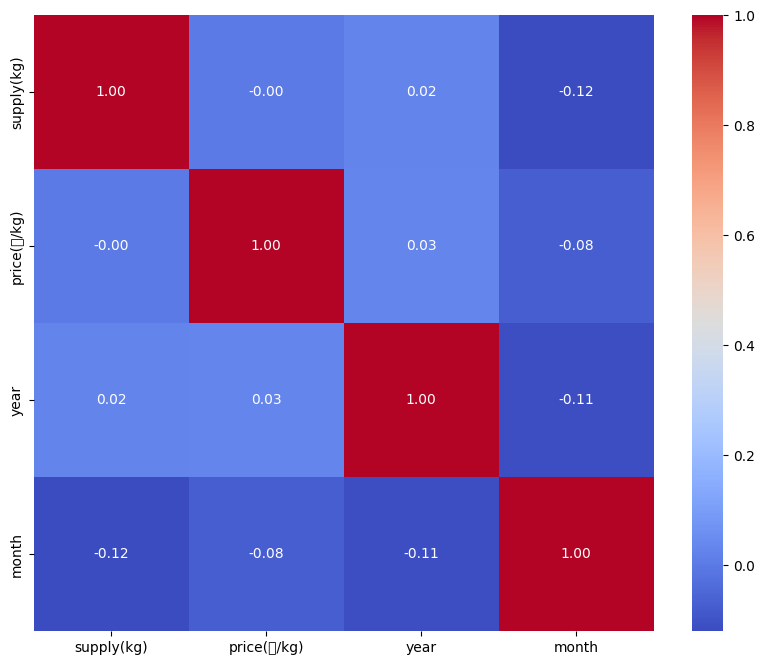

In [35]:
# 서로 낮은 상관관계
columns = df[['supply(kg)', 'price(원/kg)', 'year', 'month']]
plt.figure(figsize=(10, 8))
sns.heatmap(columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [38]:
import matplotlib
import matplotlib.font_manager as fm
fm._rebuild()
fm.get_fontconfig_fonts()
font_location = './data./NanumGothic.ttf' # 폰트 파일 이름, 디렉토리 주의
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

In [39]:
import matplotlib
import matplotlib.font_manager as fm

# 캐시 초기화
fm._rebuild()

# 아래 메소드를 사용해도 돼
fm._instantiate_fontconfig_cache()

# 폰트 경로 지정
font_location = './data./NanumGothic.ttf'  # 실제 파일 경로로 바꿔줘
font_name = fm.FontProperties(fname=font_location).get_name()

# 폰트 설정
matplotlib.rc('font', family=font_name)


AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.draw()
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.draw()
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'NanumGothic' not found.
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py

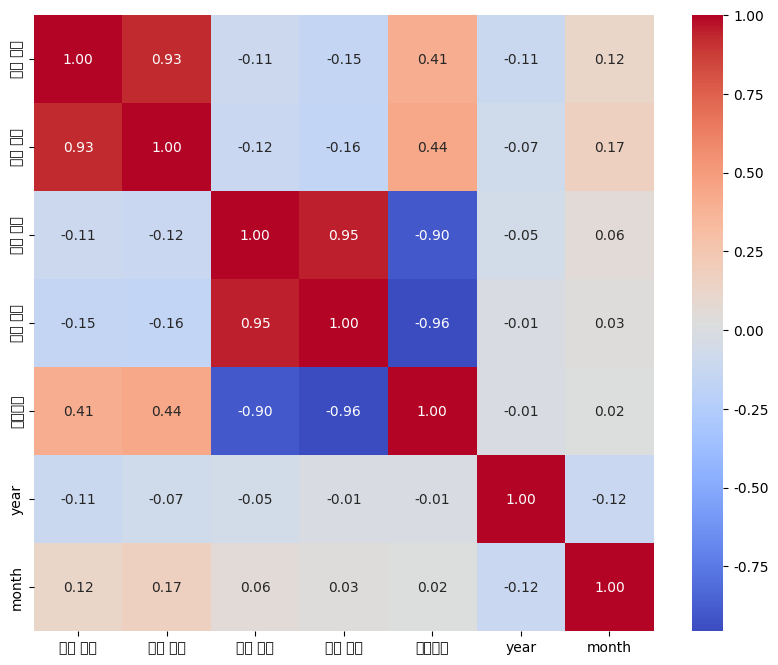

In [36]:
columns = trad_df[['수출 중량', '수출 금액', '수입 중량', '수입 금액', '무역수지', 'year', 'month']]
plt.figure(figsize=(10, 8))
sns.heatmap(columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [32]:
# 무역 수지와 수출 중량/수출 금액이 양의 상관관계가 높아 보임.
# year보다는 month가 수출 중량/금액과 관계가 높음.
trad_df2 = trad_df.drop(columns=['수입 중량', '수입 금액', 'year'])
trad_df2

,품목명,수출 중량,수출 금액,무역수지,month
3,BC,160,1,-562,1
4,CB,0,0,-38,1
5,CB,184650,94,4,1
8,CR,23150,22,-2934,1
12,RD,2627,23,-441,1
...,...,...,...,...,...
1250,CB,13188,13,-91,2
1253,CR,22510,20,-3737,2
1254,RD,4000,4,4,2
1258,RD,1319,14,-440,2


In [37]:
df
# 수출 중량-supply, 수출 금액-price이라고 판단 가능해 보임.

,ID,item,corporation,location,supply(kg),price(원/kg),year,month
0,TG_A_J_20190101,TG,A,J,0.0,0.0,2019,1
1,TG_A_J_20190102,TG,A,J,0.0,0.0,2019,1
2,TG_A_J_20190103,TG,A,J,60601.0,1728.0,2019,1
3,TG_A_J_20190104,TG,A,J,25000.0,1408.0,2019,1
4,TG_A_J_20190105,TG,A,J,32352.0,1250.0,2019,1
...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,RD,F,J,452440.0,468.0,2023,2
59393,RD_F_J_20230228,RD,F,J,421980.0,531.0,2023,2
59394,RD_F_J_20230301,RD,F,J,382980.0,574.0,2023,3
59395,RD_F_J_20230302,RD,F,J,477220.0,523.0,2023,3


In [34]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
train = df.drop(columns=['ID', 'year'])
target = df['price(원/kg)']

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.3)

In [40]:
qual_col = ['item', 'corporation', 'location']
for i in qual_col:
    le = LabelEncoder()
    x_train[i]=le.fit_transform(x_train[i])
    x_test[i]=le.transform(x_test[i])

In [41]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

def evaluate_reg_all(y_test, y_predict):
    RMSE = mean_squared_error(y_test, y_predict, squared=False)
    print(f'RMSE: {RMSE:.3F}')

In [42]:
rfr = RandomForestRegressor()

In [43]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [45]:
y_predict = rfr.predict(x_test)
evaluate_reg_all(y_test, y_predict)

RMSE: 7.675


In [46]:
test_df

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J
...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J
1088,RD_F_J_20230328,2023-03-28,RD,F,J
1089,RD_F_J_20230329,2023-03-29,RD,F,J
1090,RD_F_J_20230330,2023-03-30,RD,F,J
